# Covid-19 API 
* Data source: 
** http:www.gitub.com
** Univercity Jhon_HoKIN 
## Objective:
* use requests to get json Data
* use pandas.json_normalize to access nested json object

# auther:ຂຽນໂດຍ: ສັງຄົມ ແສງສຸລິຈັນ
* MT. EUT.edu.vn
* IDL from Laos

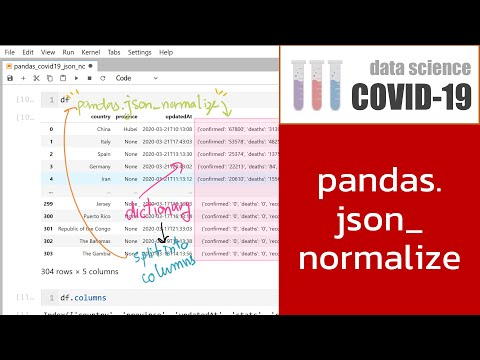

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('x_c8DQQYyh0', width= 702, height= 405)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
print(f'pandas   version: {pd.__version__}')
print(f'seaborn  version: {sns.__version__}')
print(f'requests version: {requests.__version__}')

pandas   version: 1.0.2
seaborn  version: 0.10.0
requests version: 2.23.0


In [5]:
pd.Timestamp.now()

Timestamp('2020-04-15 15:08:28.154392')

In [6]:
url='https://corona.lmao.ninja/v2/jhucsse'
r=requests.get(url)
j=r.json()
j[:3] # ໃຫ້ສະແດງ3ປະເທດທຳອິດ

[{'country': 'Canada',
  'province': 'Alberta',
  'updatedAt': '2020-04-14 23:40:54',
  'stats': {'confirmed': 1870, 'deaths': 48, 'recovered': 0},
  'coordinates': {'latitude': '53.9333', 'longitude': '-116.5765'}},
 {'country': 'United Kingdom',
  'province': 'Anguilla',
  'updatedAt': '2020-04-14 23:33:12',
  'stats': {'confirmed': 3, 'deaths': 0, 'recovered': 1},
  'coordinates': {'latitude': '18.2206', 'longitude': '-63.0686'}},
 {'country': 'China',
  'province': 'Anhui',
  'updatedAt': '2020-04-09 01:12:20',
  'stats': {'confirmed': 991, 'deaths': 6, 'recovered': 984},
  'coordinates': {'latitude': '31.8257', 'longitude': '117.2264'}}]

In [7]:
type(j)

list

In [8]:
df=pd.DataFrame(j)
df

,country,province,updatedAt,stats,coordinates
0,Canada,Alberta,2020-04-14 23:40:54,"{'confirmed': 1870, 'deaths': 48, 'recovered': 0}","{'latitude': '53.9333', 'longitude': '-116.5765'}"
1,United Kingdom,Anguilla,2020-04-14 23:33:12,"{'confirmed': 3, 'deaths': 0, 'recovered': 1}","{'latitude': '18.2206', 'longitude': '-63.0686'}"
2,China,Anhui,2020-04-09 01:12:20,"{'confirmed': 991, 'deaths': 6, 'recovered': 984}","{'latitude': '31.8257', 'longitude': '117.2264'}"
3,Netherlands,Aruba,2020-04-14 23:33:12,"{'confirmed': 92, 'deaths': 0, 'recovered': 32}","{'latitude': '12.5211', 'longitude': '-69.9683'}"
4,Australia,Australian Capital Territory,2020-04-14 23:41:11,"{'confirmed': 103, 'deaths': 2, 'recovered': 72}","{'latitude': '-35.4735', 'longitude': '149.0124'}"
...,...,...,...,...,...
316,US,District of Columbia,2020-04-14 23:33:31,"{'confirmed': 2058, 'deaths': 67, 'recovered': 0}","{'latitude': '38.90417773', 'longitude': '-77...."
317,US,Connecticut,2020-04-14 23:33:31,"{'confirmed': 13989, 'deaths': 671, 'recovered...","{'latitude': '41.26809896', 'longitude': '-73...."
318,US,Hawaii,2020-04-14 23:33:31,"{'confirmed': 511, 'deaths': 9, 'recovered': 0}","{'latitude': '19.60121157', 'longitude': '-155..."
319,US,Delaware,2020-04-14 23:33:31,"{'confirmed': 1926, 'deaths': 43, 'recovered': 0}","{'latitude': '39.08646628', 'longitude': '-75...."


### split stats (dictionary columns) into separate columns:ແຍກເອົາແຕ່ຄໍລ້ຳ stats

In [9]:
#dstats=df['stats'].apply(pd.Series)
dstats = pd.json_normalize(df.stats)
dstats

,confirmed,deaths,recovered
0,1870,48,0
1,3,0,1
2,991,6,984
3,92,0,32
4,103,2,72
...,...,...,...
316,2058,67,0
317,13989,671,0
318,511,9,0
319,1926,43,0


In [10]:
#dcoor=df['coordinate'].apply(pd.Series)
dcoor = pd.json_normalize(df.coordinates)
dcoor


,latitude,longitude
0,53.9333,-116.5765
1,18.2206,-63.0686
2,31.8257,117.2264
3,12.5211,-69.9683
4,-35.4735,149.0124
...,...,...
316,38.90417773,-77.01655992
317,41.26809896,-73.3881171
318,19.60121157,-155.5210167
319,39.08646628,-75.56884914


In [11]:
df

,country,province,updatedAt,stats,coordinates
0,Canada,Alberta,2020-04-14 23:40:54,"{'confirmed': 1870, 'deaths': 48, 'recovered': 0}","{'latitude': '53.9333', 'longitude': '-116.5765'}"
1,United Kingdom,Anguilla,2020-04-14 23:33:12,"{'confirmed': 3, 'deaths': 0, 'recovered': 1}","{'latitude': '18.2206', 'longitude': '-63.0686'}"
2,China,Anhui,2020-04-09 01:12:20,"{'confirmed': 991, 'deaths': 6, 'recovered': 984}","{'latitude': '31.8257', 'longitude': '117.2264'}"
3,Netherlands,Aruba,2020-04-14 23:33:12,"{'confirmed': 92, 'deaths': 0, 'recovered': 32}","{'latitude': '12.5211', 'longitude': '-69.9683'}"
4,Australia,Australian Capital Territory,2020-04-14 23:41:11,"{'confirmed': 103, 'deaths': 2, 'recovered': 72}","{'latitude': '-35.4735', 'longitude': '149.0124'}"
...,...,...,...,...,...
316,US,District of Columbia,2020-04-14 23:33:31,"{'confirmed': 2058, 'deaths': 67, 'recovered': 0}","{'latitude': '38.90417773', 'longitude': '-77...."
317,US,Connecticut,2020-04-14 23:33:31,"{'confirmed': 13989, 'deaths': 671, 'recovered...","{'latitude': '41.26809896', 'longitude': '-73...."
318,US,Hawaii,2020-04-14 23:33:31,"{'confirmed': 511, 'deaths': 9, 'recovered': 0}","{'latitude': '19.60121157', 'longitude': '-155..."
319,US,Delaware,2020-04-14 23:33:31,"{'confirmed': 1926, 'deaths': 43, 'recovered': 0}","{'latitude': '39.08646628', 'longitude': '-75...."


In [12]:
df.columns

Index(['country', 'province', 'updatedAt', 'stats', 'coordinates'], dtype='object')

### Created final dataframe

In [13]:
ds=pd.concat([df[['country', 'province', 'updatedAt']], dstats, dcoor], axis=1)
ds

,country,province,updatedAt,confirmed,deaths,recovered,latitude,longitude
0,Canada,Alberta,2020-04-14 23:40:54,1870,48,0,53.9333,-116.5765
1,United Kingdom,Anguilla,2020-04-14 23:33:12,3,0,1,18.2206,-63.0686
2,China,Anhui,2020-04-09 01:12:20,991,6,984,31.8257,117.2264
3,Netherlands,Aruba,2020-04-14 23:33:12,92,0,32,12.5211,-69.9683
4,Australia,Australian Capital Territory,2020-04-14 23:41:11,103,2,72,-35.4735,149.0124
...,...,...,...,...,...,...,...,...
316,US,District of Columbia,2020-04-14 23:33:31,2058,67,0,38.90417773,-77.01655992
317,US,Connecticut,2020-04-14 23:33:31,13989,671,0,41.26809896,-73.3881171
318,US,Hawaii,2020-04-14 23:33:31,511,9,0,19.60121157,-155.5210167
319,US,Delaware,2020-04-14 23:33:31,1926,43,0,39.08646628,-75.56884914


In [14]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    321 non-null    object
 1   province   140 non-null    object
 2   updatedAt  321 non-null    object
 3   confirmed  321 non-null    int64 
 4   deaths     321 non-null    int64 
 5   recovered  321 non-null    int64 
 6   latitude   321 non-null    object
 7   longitude  321 non-null    object
dtypes: int64(3), object(5)
memory usage: 20.2+ KB


In [15]:
ds['updatedAt']=ds['updatedAt'].astype('datetime64')

In [16]:
ds.columns

Index(['country', 'province', 'updatedAt', 'confirmed', 'deaths', 'recovered',
       'latitude', 'longitude'],
      dtype='object')

In [17]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   country    321 non-null    object        
 1   province   140 non-null    object        
 2   updatedAt  321 non-null    datetime64[ns]
 3   confirmed  321 non-null    int64         
 4   deaths     321 non-null    int64         
 5   recovered  321 non-null    int64         
 6   latitude   321 non-null    object        
 7   longitude  321 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 20.2+ KB


In [18]:
ds.confirmed.sum()

1976192

In [19]:
ds[ds['country']=='Laos']

,country,province,updatedAt,confirmed,deaths,recovered,latitude,longitude
179,Laos,None,2020-04-14 23:33:12,19,0,1,19.856270000000002,102.495496


In [20]:
ds[['confirmed','deaths','recovered']].sum()

confirmed    1976192
deaths        125985
recovered     474261
dtype: int64

In [21]:
ds[['country', 'confirmed', 'deaths', 'recovered']].groupby('country').sum()

,confirmed,deaths,recovered
country,,,
Afghanistan,714,23,40
Albania,475,24,248
Algeria,2070,326,691
Andorra,659,31,128
Angola,19,2,5
...,...,...,...
West Bank and Gaza,308,2,62
Western Sahara,6,0,0
Yemen,1,0,0


In [22]:
dq=ds[ds['country'].str.contains('Thailand|Malaysia|Singapore|Vietnam|Laos')]
dq

,country,province,updatedAt,confirmed,deaths,recovered,latitude,longitude
179,Laos,None,2020-04-14 23:33:12,19,0,1,19.856270000000002,102.495496
190,Malaysia,None,2020-04-14 23:33:12,4987,82,2478,4.210483999999999,101.97576600000001
235,Singapore,None,2020-04-14 23:33:12,3252,10,611,1.2833,103.8333
250,Thailand,None,2020-04-14 23:33:12,2613,41,1405,15.870032,100.992541
263,Vietnam,None,2020-04-14 23:33:12,266,0,169,14.058323999999999,108.277199


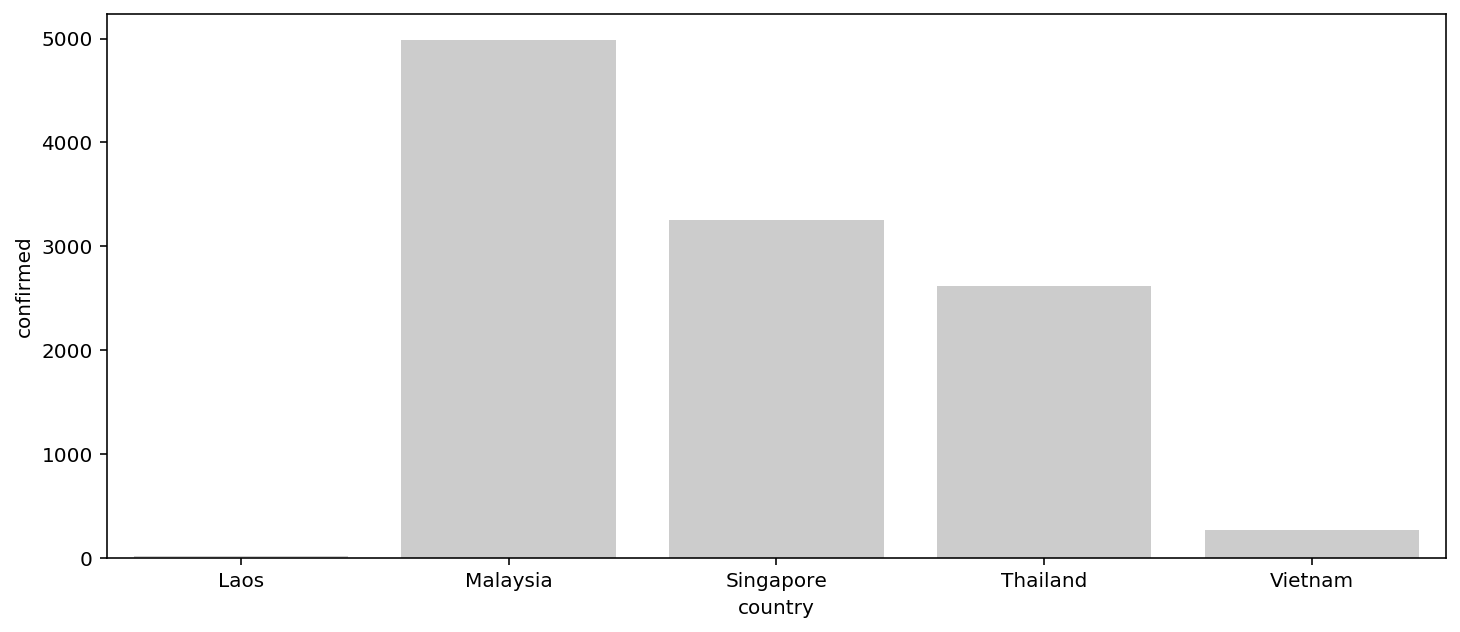

In [23]:
plt.figure(figsize=(12,5))
sns.barplot(data=dq, x='country', y='confirmed', color='.8')

In [24]:
colors=['.8' if c != 'Vietnam' else 'salmon' for c in dq['country']]
colors

['.8', '.8', '.8', '.8', 'salmon']

In [25]:
str(ds.loc[0, 'updatedAt'])

'2020-04-14 23:40:54'

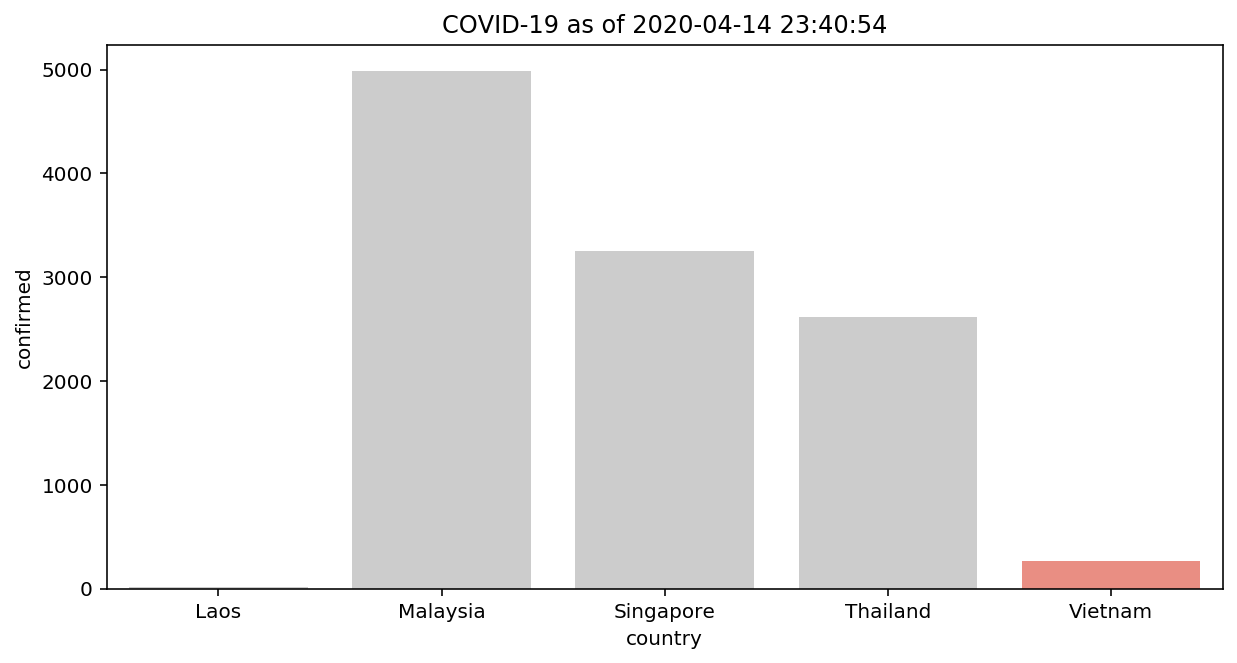

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(data=dq, x='country', y='confirmed', palette=colors)
plt.title(f"COVID-19 as of {str(ds.loc[0, 'updatedAt'])}");

### ລອງໃຊ້ ເສັ້ນສະແດງສະນິດເສັ້ນຊື່

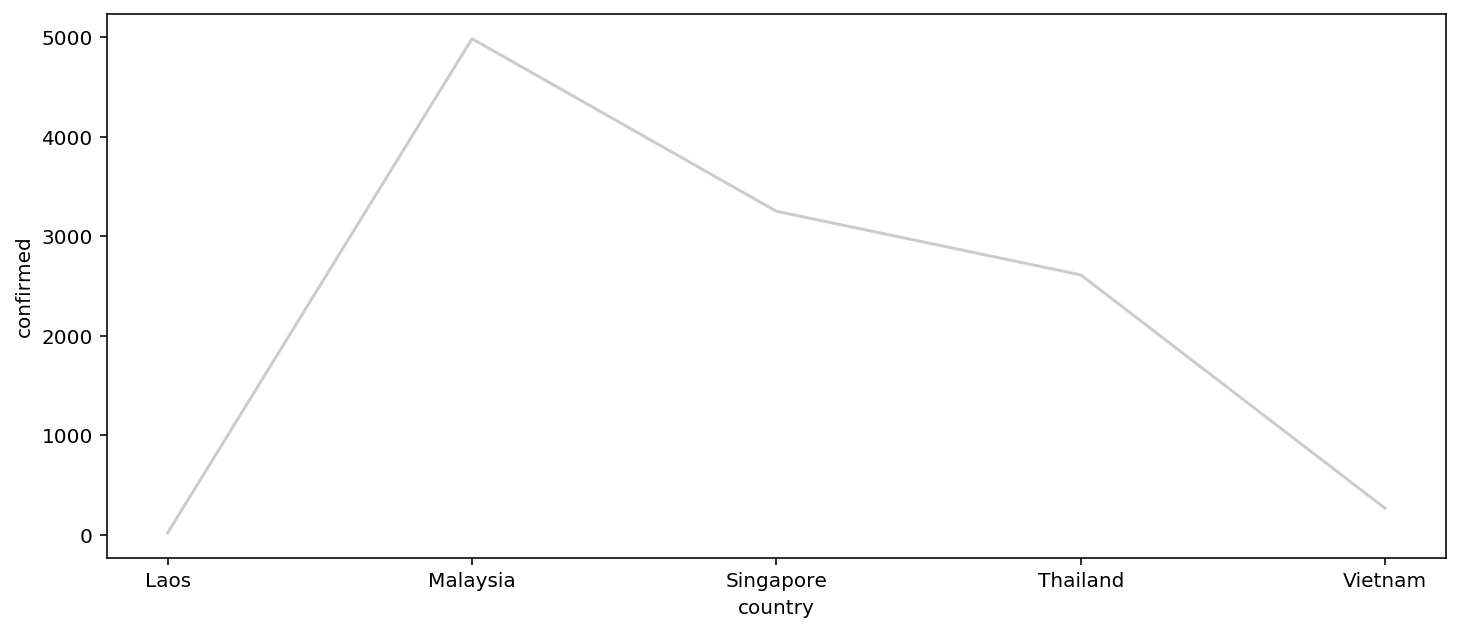

In [27]:
plt.figure(figsize=(12,5))
sns.lineplot(data=dq, x='country', y='confirmed', color='.8')